# Zero Shot Learning

## Installing Libraries

In [6]:
! pip install transformers
! pip install matplotlib
! pip install seaborn

  Using cached seaborn-0.12.1-py3-none-any.whl (288 kB)


## Importing Libraries

In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import json
import re 
from random import shuffle
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore")

## Reading Videos Dataset

In [8]:
video_dataset = pd.read_csv("USvideos.csv")

In [9]:
video_dataset.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


## Correlation Between Dataset Columns

<AxesSubplot: >

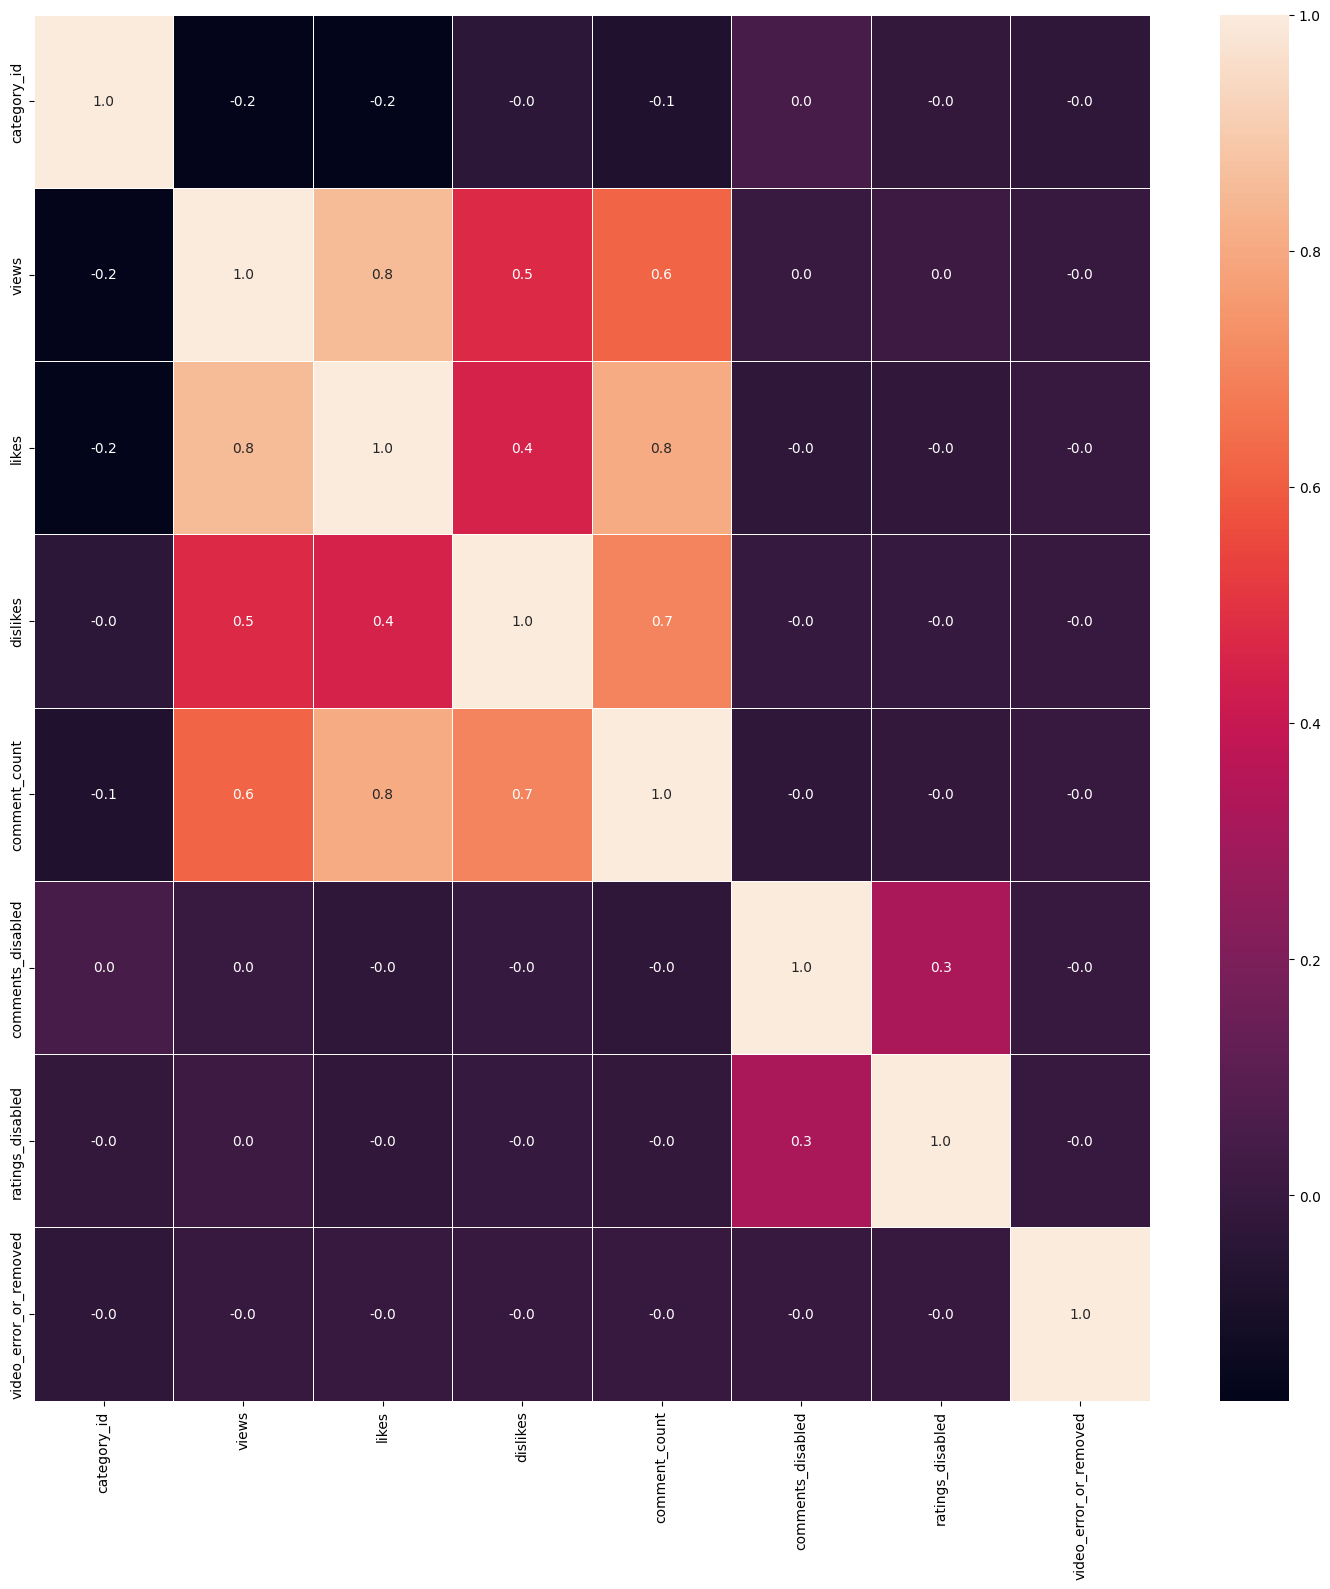

In [10]:
f,ax = plt.subplots(figsize=(18, 18))

sns.heatmap(video_dataset.corr(), 
            annot=True, linewidths=.5, fmt= '.1f',ax=ax)

## Data Refactoring

In [11]:
all_categories = {
  "1":"Film & Animation",
  "2":"Autos & Vehicles",
  "10":"Music",
  "15":"Pets & Animals",
  "17":"Sports",
  "18":"Short Movies",
  "19":"Travel & Events",
  "20":"Gaming",
  "21":"Videoblogging",
  "22":"People & Blogs",
  "23":"Comedy",
  "24":"Entertainment",
  "25":"News & Politics",
  "26":"How to & Style",
  "27":"Education",
  "28":"Science & Technology",
  "29":"Nonprofits & Activism",
  "30":"Movies",
  "31":"Anime/Animation",
  "32":"Action/Adventure",
  "33":"Classics",
  "34":"Comedy",
  "35":"Documentary",
  "36":"Drama",
  "37":"Family",
  "38":"Foreign",
  "39":"Horror",
  "40":"Sci-Fi/Fantasy",
  "41":"Thriller",
  "42":"Shorts",
  "43":"Shows",
  "44":"Trailers"
  }

In [12]:
video_dataset["cateogory_name"] = ""
 
for index, row in tqdm(video_dataset.iterrows(), total=video_dataset.shape[0]):
    cat_id = row['category_id']
    cat_name = all_categories[str(cat_id)]
    video_dataset.at[index,'cateogory_name'] = cat_name

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40949/40949 [00:06<00:00, 6038.86it/s]


In [13]:
relevant_columns = ["video_id", "title", "description", "cateogory_name"]
video_dataset = video_dataset[relevant_columns]

In [14]:
video_dataset.head()

,video_id,title,description,cateogory_name
0,2kyS6SvSYSE,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,The Trump Presidency: Last Week Tonight with J...,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,"Racist Superman | Rudy Mancuso, King Bach & Le...",WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,Nickelback Lyrics: Real or Fake?,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,I Dare You: GOING BALD!?,I know it's been a while since we did this sho...,Entertainment


## Data Distribution

In [18]:
video_dataset["cateogory_name"].value_counts()

Entertainment            9964
Music                    6472
How to & Style           4146
Comedy                   3457
People & Blogs           3210
News & Politics          2487
Science & Technology     2401
Film & Animation         2345
Sports                   2174
Education                1656
Pets & Animals            920
Gaming                    817
Travel & Events           402
Autos & Vehicles          384
Nonprofits & Activism      57
Shows                      57
Name: cateogory_name, dtype: int64

## Creating Dataset Containing all the Video Categories

In [21]:
distributed_dataset = video_dataset[video_dataset["cateogory_name"]=="Shows"]

In [23]:
distributed_dataset = distributed_dataset.append(video_dataset[video_dataset["cateogory_name"]=="Nonprofits & Activism"])

In [27]:
remaining_category = [
    "Entertainment",            
    "Music",                    
    "How to & Style",           
    "Comedy",                   
    "People & Blogs",           
    "News & Politics",          
    "Science & Technology",     
    "Film & Animation",         
    "Sports",                   
    "Education",                
    "Pets & Animals",            
    "Gaming",                    
    "Travel & Events",           
    "Autos & Vehicles" 
]

for videos in remaining_category:
    temp_frame = video_dataset[video_dataset["cateogory_name"]==videos].head(100)
    distributed_dataset = distributed_dataset.append(temp_frame)

In [28]:
distributed_dataset.shape

(1514, 4)

## Shuffling Dataframe

In [29]:
distributed_dataset = distributed_dataset.sample(frac=1).reset_index(drop=True)

## Video Classification using Zero-Shot on Video Titles

In [30]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli")

all_categories = [
    "Film & Animation", "Autos & Vehicles", "Music", "Pets & Animals",
    "Sports", "Short Movies", "Travel & Events", "Gaming", "Videoblogging",
    "People & Blogs", "Comedy", "Entertainment", "News & Politics",
    "How to & Style", "Education", "Science & Technology", "Nonprofits & Activism",
    "Movies", "Anime/Animation", "Action/Adventure", "Classics", "Comedy",
    "Documentary", "Drama", "Family", "Foreign", "Horror", "Sci-Fi/Fantasy",
    "Thriller", "Shorts", "Shows", "Trailers"
]

In [31]:
actuals = list(distributed_dataset["cateogory_name"])
predictions = []

In [32]:
for index, row in tqdm(distributed_dataset.iterrows(), 
                       total=distributed_dataset.shape[0]):
    video_title = row['title']
    zero_short_response = classifier(video_title, 
                                   all_categories, 
                                   multi_label=True)
    predictions.append(zero_short_response['labels'][0])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1514/1514 [2:07:59<00:00,  5.07s/it]


In [45]:
data_tuples = list(zip(actuals,predictions))

In [47]:
results = pd.DataFrame(data_tuples, columns=['actuals','predictions'])

In [48]:
results

,actuals,predictions
0,Nonprofits & Activism,Horror
1,Shows,Shows
2,News & Politics,Action/Adventure
3,People & Blogs,Family
4,Music,Music
...,...,...
1509,Nonprofits & Activism,Shows
1510,Pets & Animals,Family
1511,Pets & Animals,Comedy
1512,Comedy,Shows


In [49]:
results.to_csv("Few-Shot-Results.csv",index=False)